In [5]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im
import os
import time
import math
import cv2
from keras.datasets import mnist
from keras import layers
from keras.layers import Input, Dense, Reshape, Dropout, Conv2D, UpSampling2D
from keras.models import Model

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
def showImage(arr):
    plt.imshow(arr, cmap = 'gray')
    plt.show()

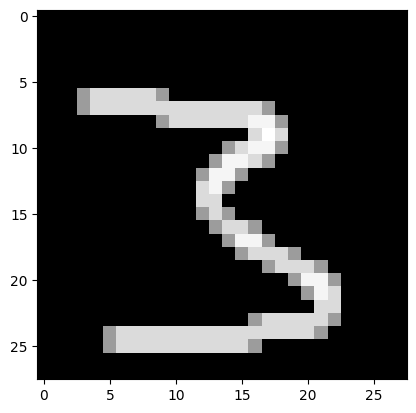

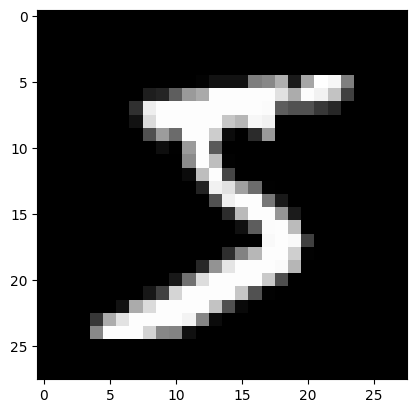

In [12]:
def choose(n,k):
    assert(n>=k)
    return math.comb(n,k)
def bezier(pointsX,pointsY,acc):
    assert(len(pointsX)==len(pointsY))
    l = len(pointsX)
    curve = []
    for t in np.linspace(0,1,num=acc):
        sumX = 0
        sumY = 0
        for i in range(l):
            coeff = choose(l-1, i) * (1 - t)**(l - i-1) * t**i
            sumX += coeff * pointsX[i]
            sumY += coeff * pointsY[i]
        curve.append((sumX,sumY))
    return np.array(curve)
def map_mnist(pointsX, pointsY, acc, width, alpha):
    bez = bezier(pointsX, pointsY, acc)
    scaled_bez = (bez * 28).astype(int)
    im = np.zeros((28, 28))

    for i in range(len(scaled_bez) - 1):
        x0, y0 = scaled_bez[i]
        x1, y1 = scaled_bez[i + 1]
        dx = x1 - x0
        dy = y1 - y0
        length = max(abs(dx), abs(dy))  # Length of the line segment
        if length == 0:
            continue
        dx /= length
        dy /= length

        for j in range(int(length)):
            x = int(x0 + dx * j)
            y = int(y0 + dy * j)
            for k in range(-width // 2, width // 2 + 1):
                for l in range(-width // 2, width // 2 + 1):
                    if 0 <= x + k < 28 and 0 <= y + l < 28:
                        im[y + l, x + k] += 1

    # Apply alpha dropoff
    im = 1 - np.exp(-alpha * im)

    return np.clip(im[::-1, :], 0, 1)


# x=[0.2,0.96,0.27,0.04,1.06,0.18]
# y=[0.794,0.882,0.55,0.566,0.283,0.336]

# print(bezier(x,y,5000)[2000])

x = [0.162,1.387,0.166,-0.364,1.97,0.184]
y = [0.753,0.76,0.446,0.623,0.1,0.133]

# bez = bezier(x,y, acc = 10)

# showImage(bez)
# Example usage with width=1 and alpha=0.1
result_image = map_mnist(x, y, 60, width=1, alpha=0.9)
showImage(result_image)
showImage(train_images[0])

In [13]:
def generator(latent_dim):
    input_layer = Input(shape=(latent_dim,))
    x = Dense(256, activation='relu')(input_layer)
    x = Dense(512, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    
    # Reshape control points
    control_points = Reshape((2, 15))(x)
    
    # Output layer
    output_im = control_points
    
    # Model
    model = Model(input_layer, output_im)
    return model

# Example usage:
latent_dim = 128
generator_model = generator(latent_dim)
# generator_model.summary()

def generate_mnist(latent_dim):
    a = generator_model.predict(latent_dim)[0,:,:]
    controlX, controlY = *a[:, :],
    bez = map_mnist(controlX, controlY, acc = 500, width=1, alpha=1)
    return bez

lat = np.random.rand(1, 128)
showImage(generate_mnist(lat))



AttributeError: 'function' object has no attribute 'summary'